In [1]:
from ucimlrepo import fetch_ucirepo 
support2 = fetch_ucirepo(id=880) 

In [2]:
X = support2.data.features 
y = support2.data.targets 
  
print(support2.metadata) 
print(support2.variables) 

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

Import library yang digunakan

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
from lifelines import KaplanMeierFitter

Jadikan dataframe

In [4]:
df = pd.concat([X, y], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

In [5]:
print(df.describe())

               age       num.co          edu        scoma       charges  \
count  9105.000000  9105.000000  7471.000000  9104.000000  8.933000e+03   
mean     62.650823     1.868644    11.747691    12.058546  5.999579e+04   
std      15.593710     1.344409     3.447743    24.636694  1.026488e+05   
min      18.041990     0.000000     0.000000     0.000000  1.169000e+03   
25%      52.797000     1.000000    10.000000     0.000000  9.740000e+03   
50%      64.856990     2.000000    12.000000     0.000000  2.502400e+04   
75%      73.998960     3.000000    14.000000     9.000000  6.459800e+04   
max     101.847960     9.000000    31.000000   100.000000  1.435423e+06   

              totcst        totmcst      avtisst          sps          aps  \
count    8217.000000    5630.000000  9023.000000  9104.000000  9104.000000   
mean    30825.867768   28828.877838    22.610928    25.525872    37.597979   
std     45780.820986   43604.261932    13.233248     9.899377    19.903852   
min         

In [6]:
df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,0,0,no(M2 and SIP pres)


Distribusi fitur awal

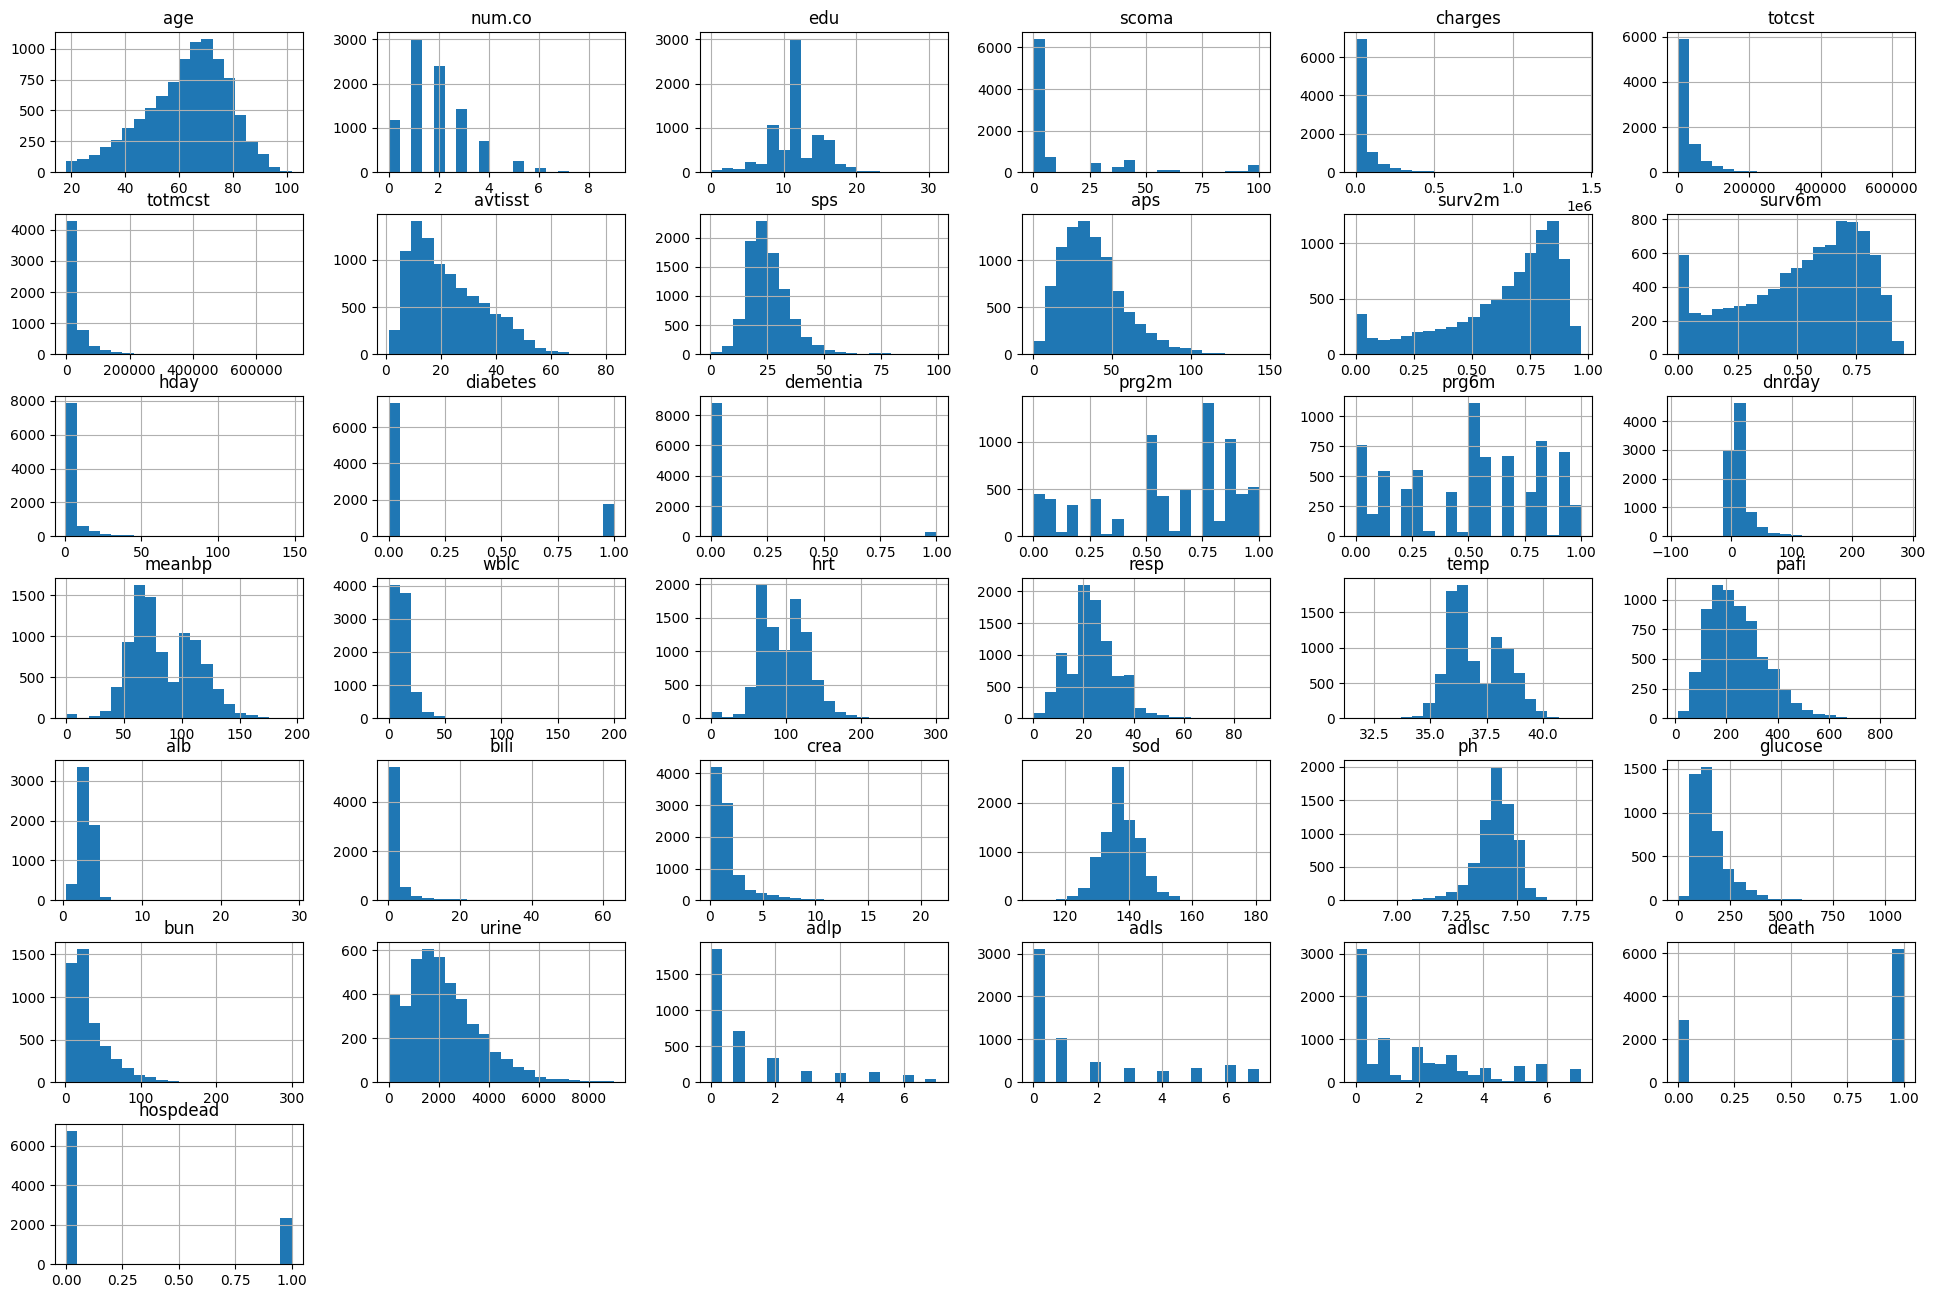

In [7]:
df.hist(figsize=(24, 16), bins=20)
plt.show()

# Handling missing value

In [9]:
# df_numeric = df.select_dtypes(include=['number'])
# num_imputer_median = SimpleImputer(strategy='median')
# df_median = df.copy()
# df_median[df_numeric.columns] = num_imputer_median.fit_transform(df_numeric)

In [10]:
# num_imputer_mean = SimpleImputer(strategy='mean')
# df_mean = df.copy()
# df_mean[df_numeric.columns] = num_imputer_mean.fit_transform(df_numeric)

#### Imputasi dengan nilai median berdasarkan 'death'.
nilai median dari kelompok yang sama dalam kolom ‘death’ membuat lebih akurat dibandingkan mengisi dengan median keseluruhan.

In [11]:
df_median_death = df.copy()
df_numeric = df_median_death.select_dtypes(include=['number'])
for col in df_numeric.columns:
    df_median_death[col] = df.groupby('death')[col].transform(lambda x: x.fillna(x.median()))

In [12]:
# from sklearn.experimental import enable_iterative_imputer  
# from sklearn.impute import IterativeImputer  
# import pandas as pd

# numerical_cols = df.select_dtypes(include=['number']).columns
# from sklearn.impute import KNNImputer  

# knn_imputer = KNNImputer(n_neighbors=5)

# df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])
# df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# print(df.isnull().sum())



#### Perbandingan distribusi sebelum dan setelah imputasi.
Mendeteksi perubahan yang tidak diinginkan, misalnya jika imputasi menyebabkan distribusi terlalu berbeda dari aslinya.

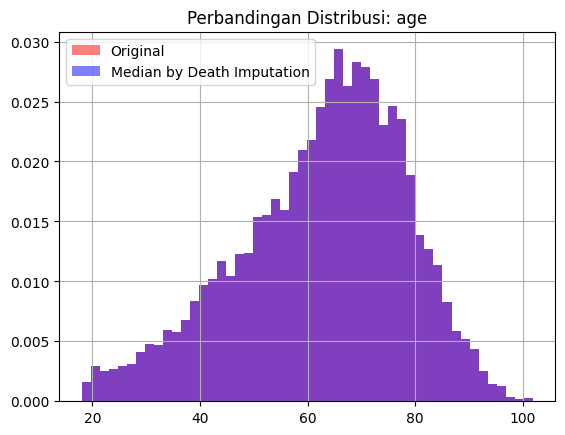

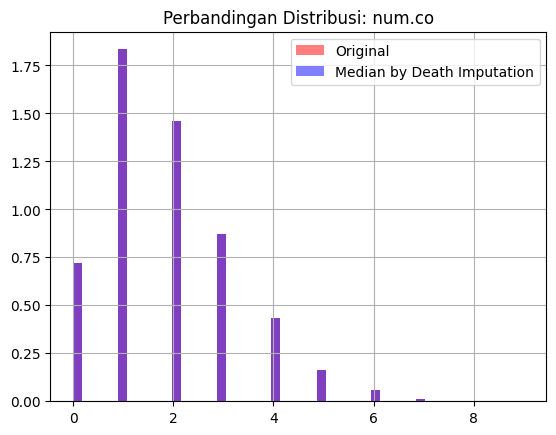

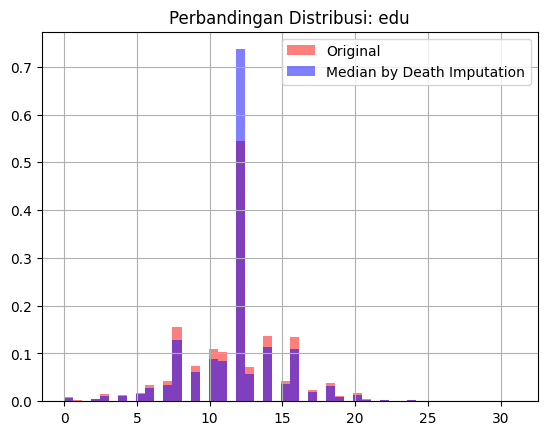

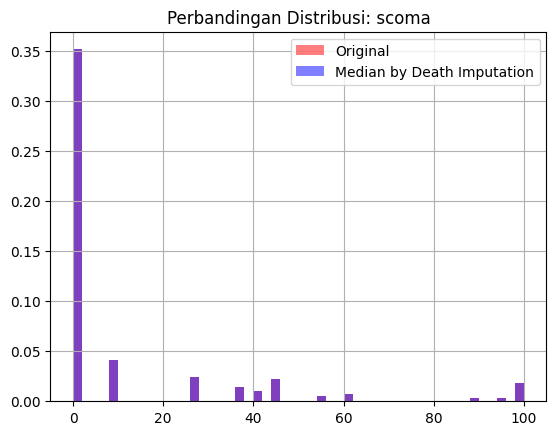

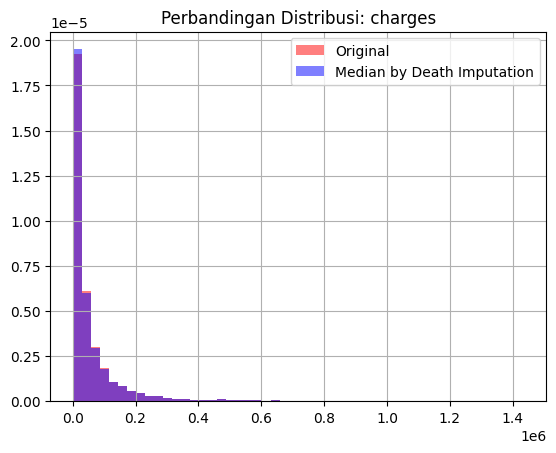

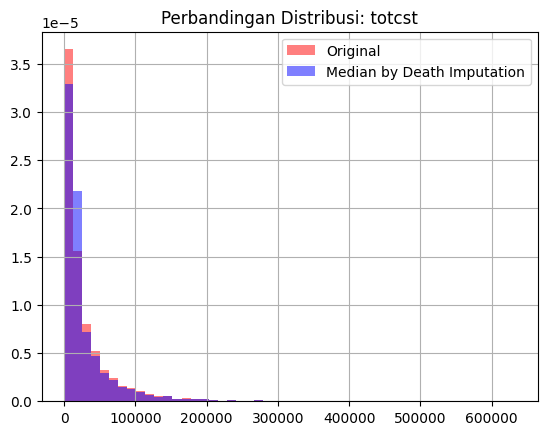

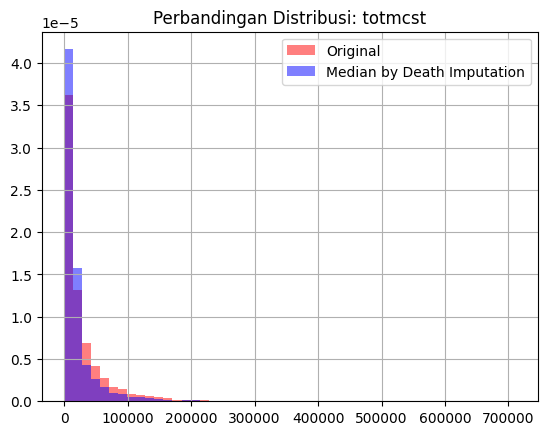

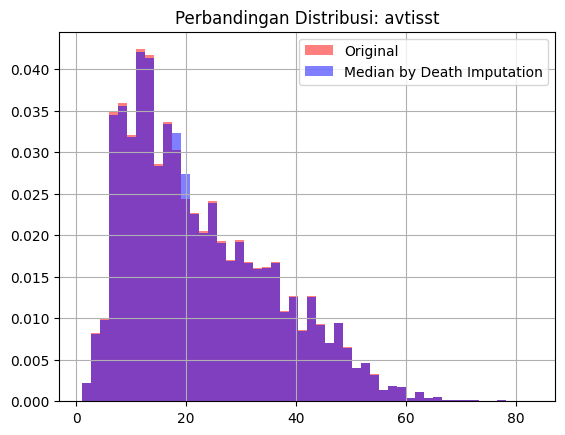

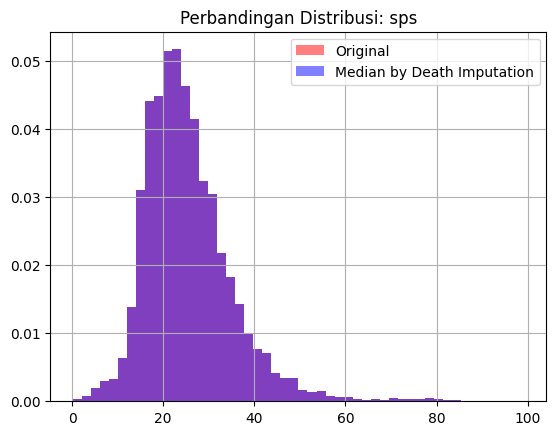

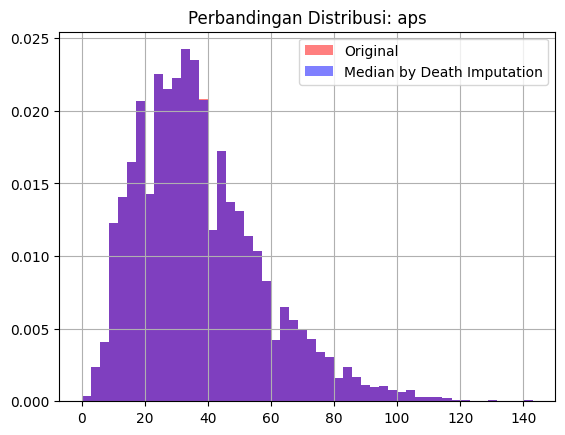

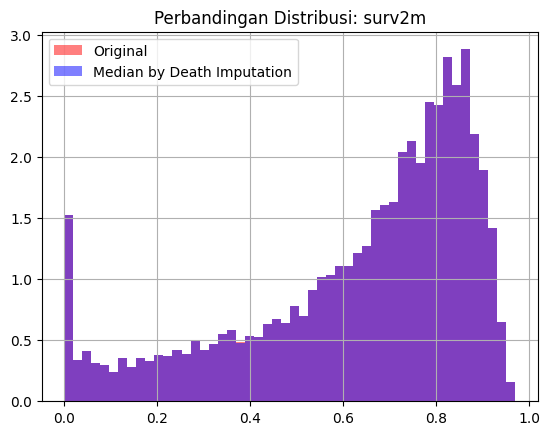

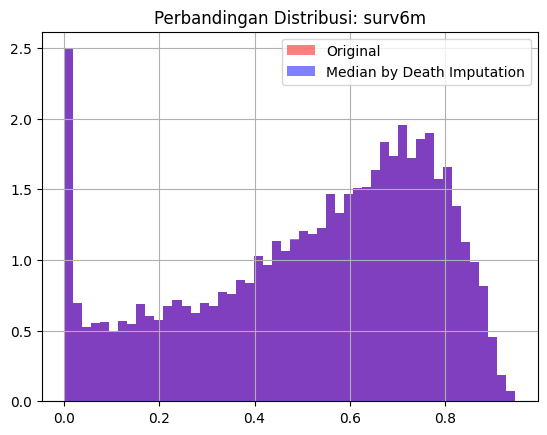

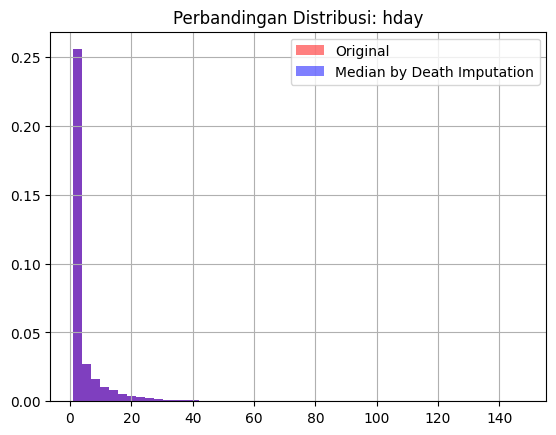

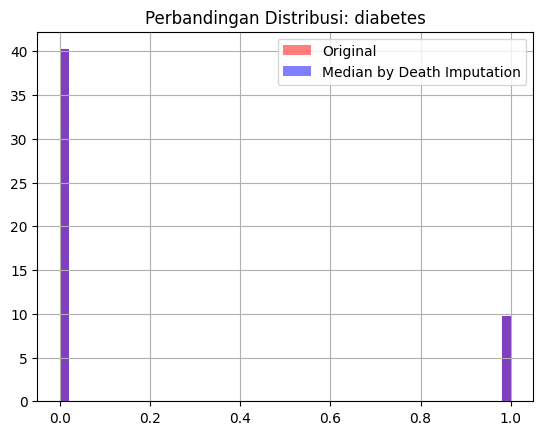

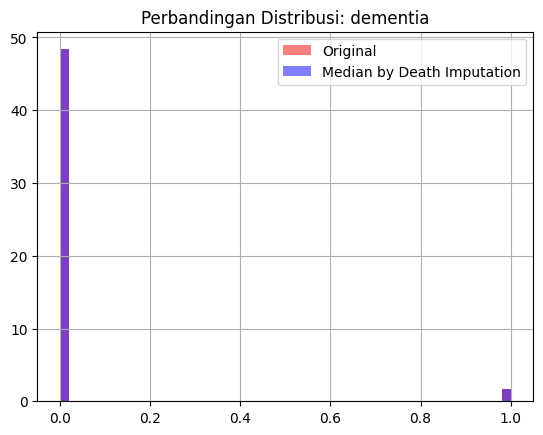

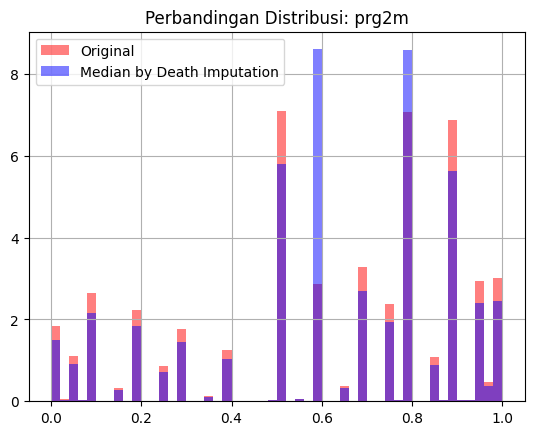

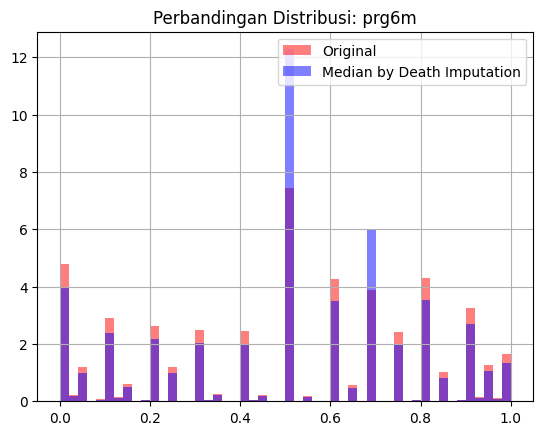

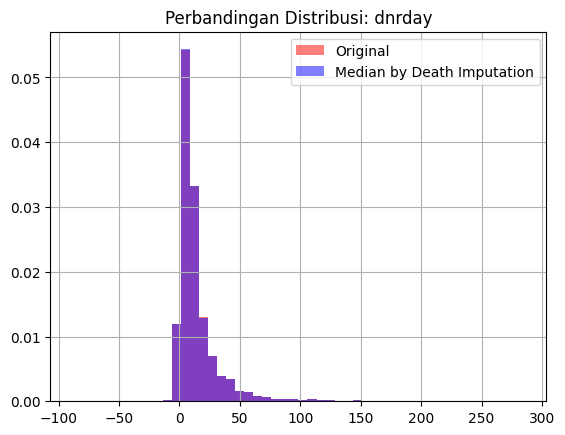

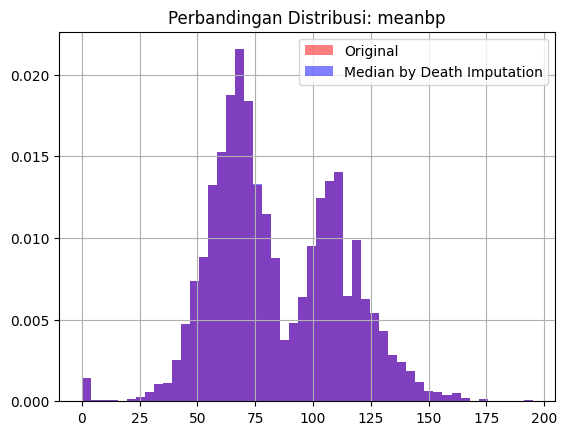

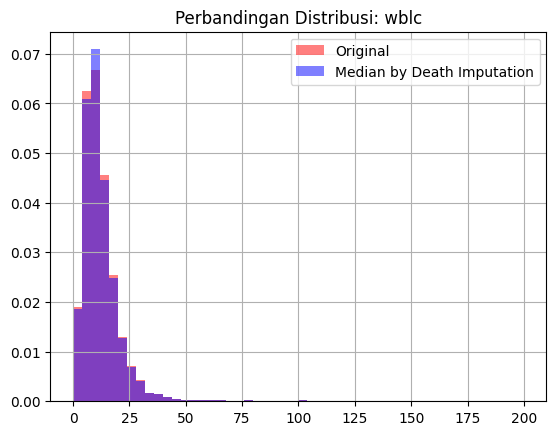

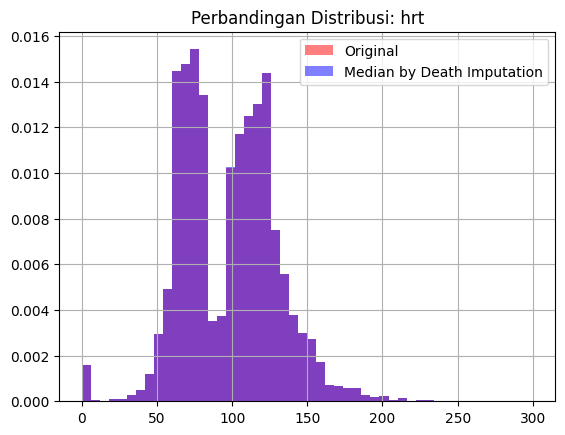

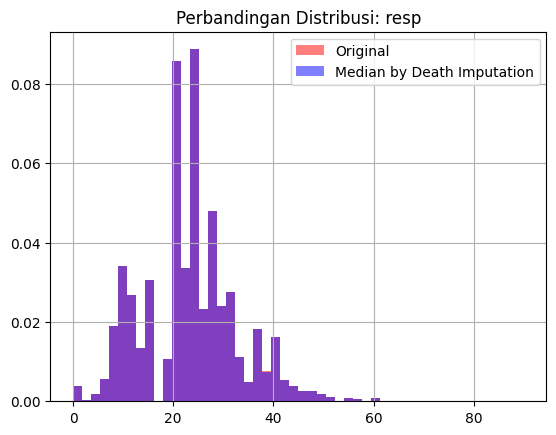

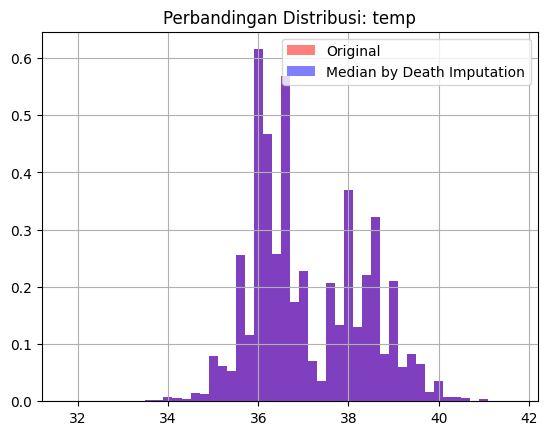

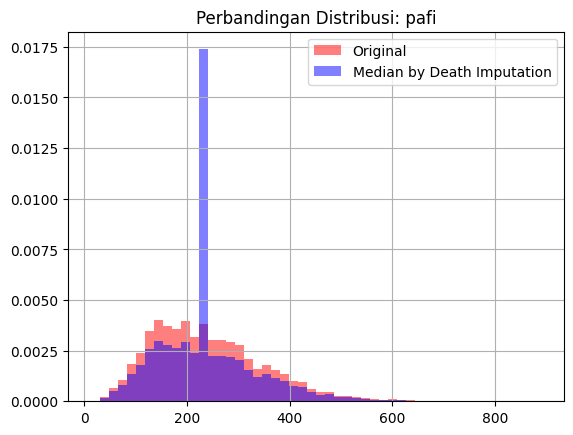

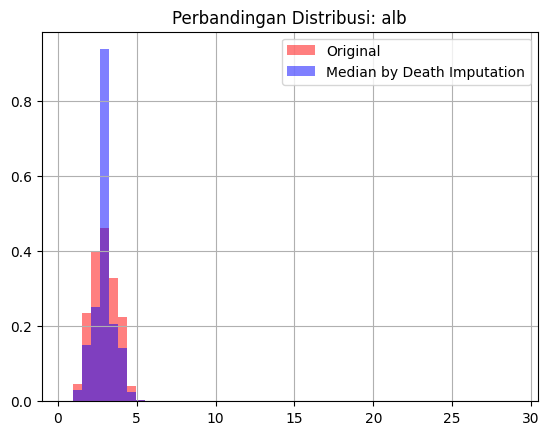

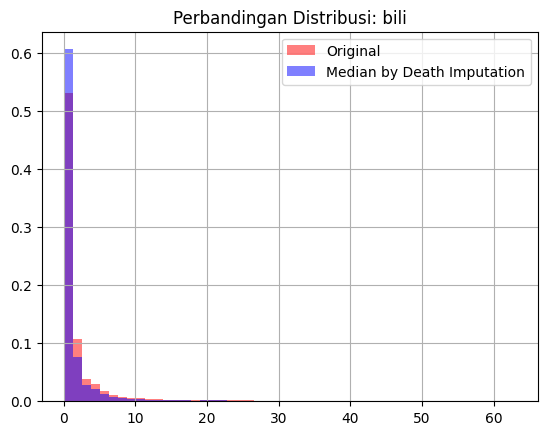

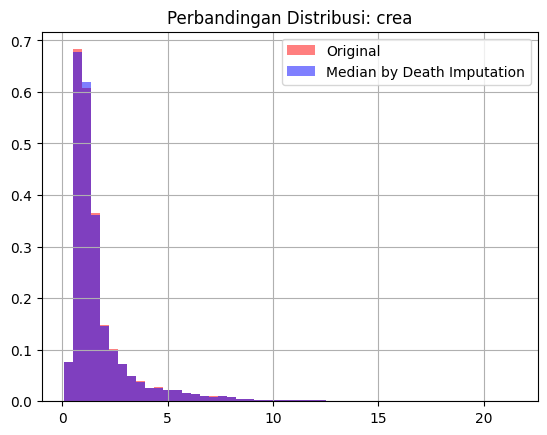

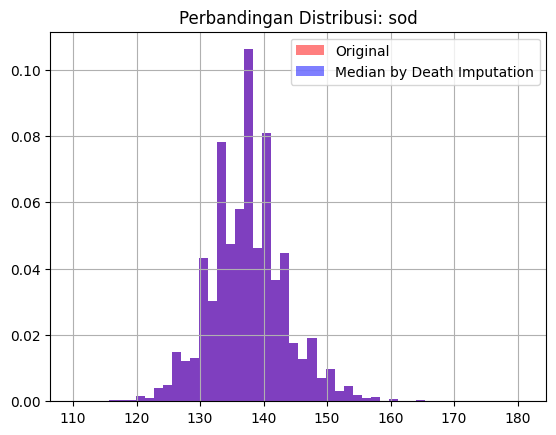

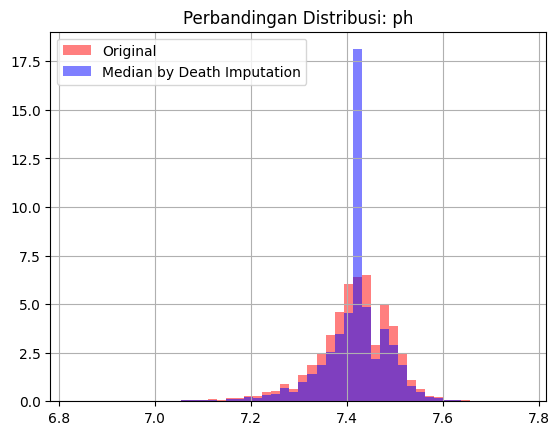

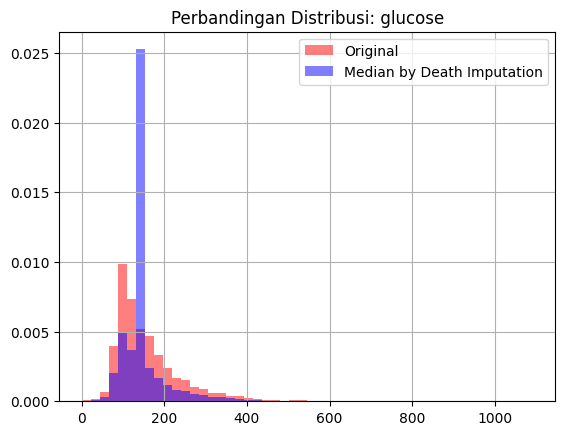

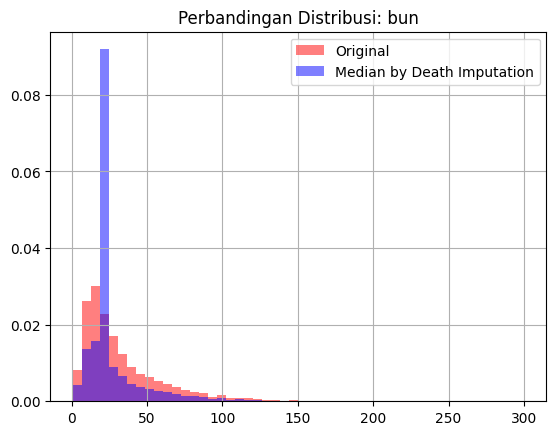

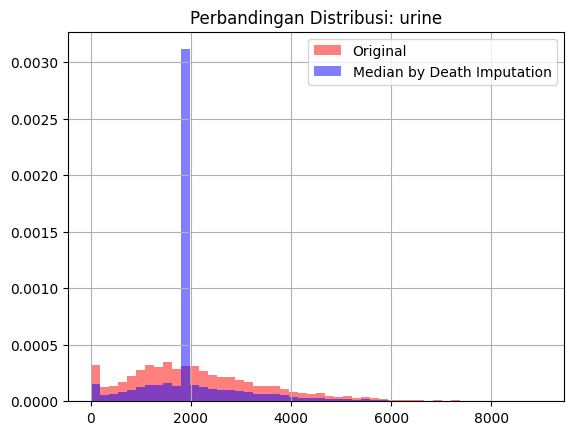

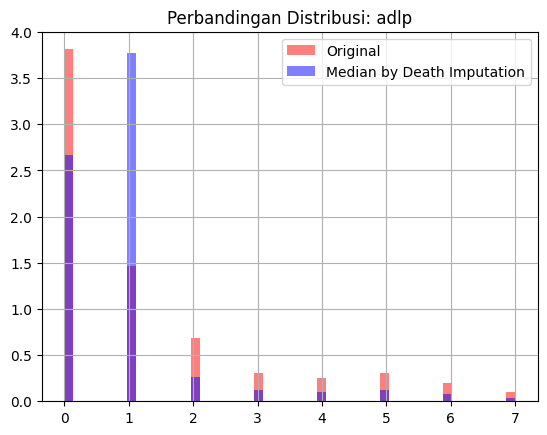

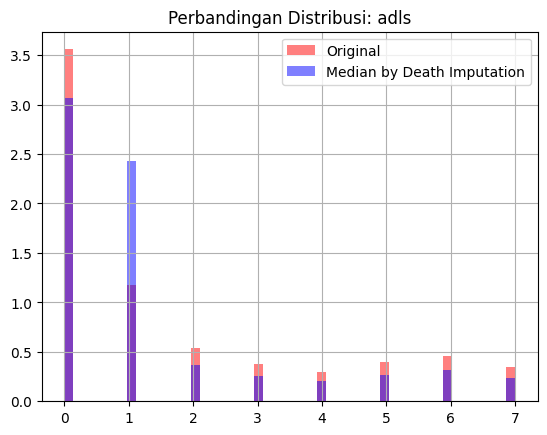

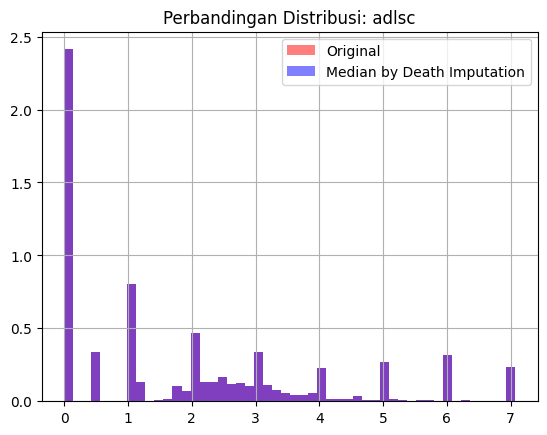

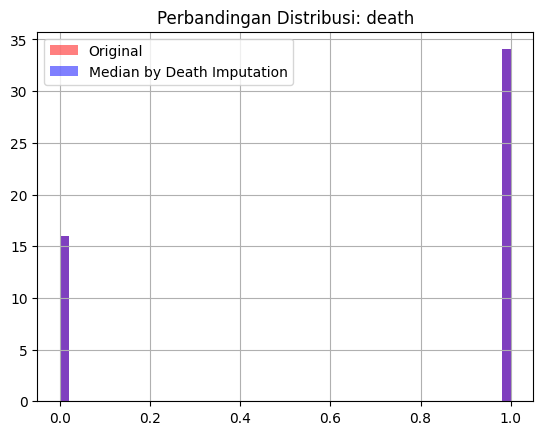

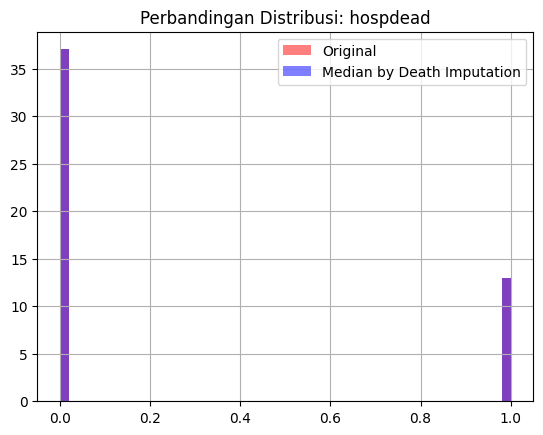

In [13]:
for col in df_numeric.columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[col].hist(bins=50, ax=ax, density=True, color='red', alpha=0.5, label='Original')
    df_median_death[col].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5, label='Median by Death Imputation')
    plt.title(f'Perbandingan Distribusi: {col}')
    plt.legend()
    plt.show()

#### Mengisi missing value kolom kategorikal dengan modus
Memastikan data tetap representatif, karena nilai yang paling sering muncul kemungkinan besar adalah kategori yang benar

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
# df_median[cat_cols] = cat_imputer.fit_transform(df_median[cat_cols])
# df_mean[cat_cols] = cat_imputer.fit_transform(df_mean[cat_cols])
df_median_death[cat_cols] = cat_imputer.fit_transform(df_median_death[cat_cols])

In [15]:
# df_median.info()
# df_median.head()

In [16]:
# df_mean.info()
# df_mean.head()

In [17]:
df_median_death.info()
df_median_death.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       9105 non-null   float64
 6   income    9105 non-null   object 
 7   scoma     9105 non-null   float64
 8   charges   9105 non-null   float64
 9   totcst    9105 non-null   float64
 10  totmcst   9105 non-null   float64
 11  avtisst   9105 non-null   float64
 12  race      9105 non-null   object 
 13  sps       9105 non-null   float64
 14  aps       9105 non-null   float64
 15  surv2m    9105 non-null   float64
 16  surv6m    9105 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,15631.82815,...,7.459961,132.0,24.0,1937.5,7.0,7.0,7.0,0,0,<2 mo. follow-up
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,13870.95310,...,7.250000,137.0,23.0,1979.0,1.0,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,13870.95310,...,7.459961,137.0,23.0,1979.0,1.0,0.0,0.0,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,13870.95310,...,7.419922,137.0,23.0,1979.0,0.0,0.0,0.0,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,26.0,50127.0,15631.82815,...,7.509766,132.0,24.0,1937.5,0.0,2.0,2.0,0,0,no(M2 and SIP pres)


# Handling outlier

Boxplot Outlier

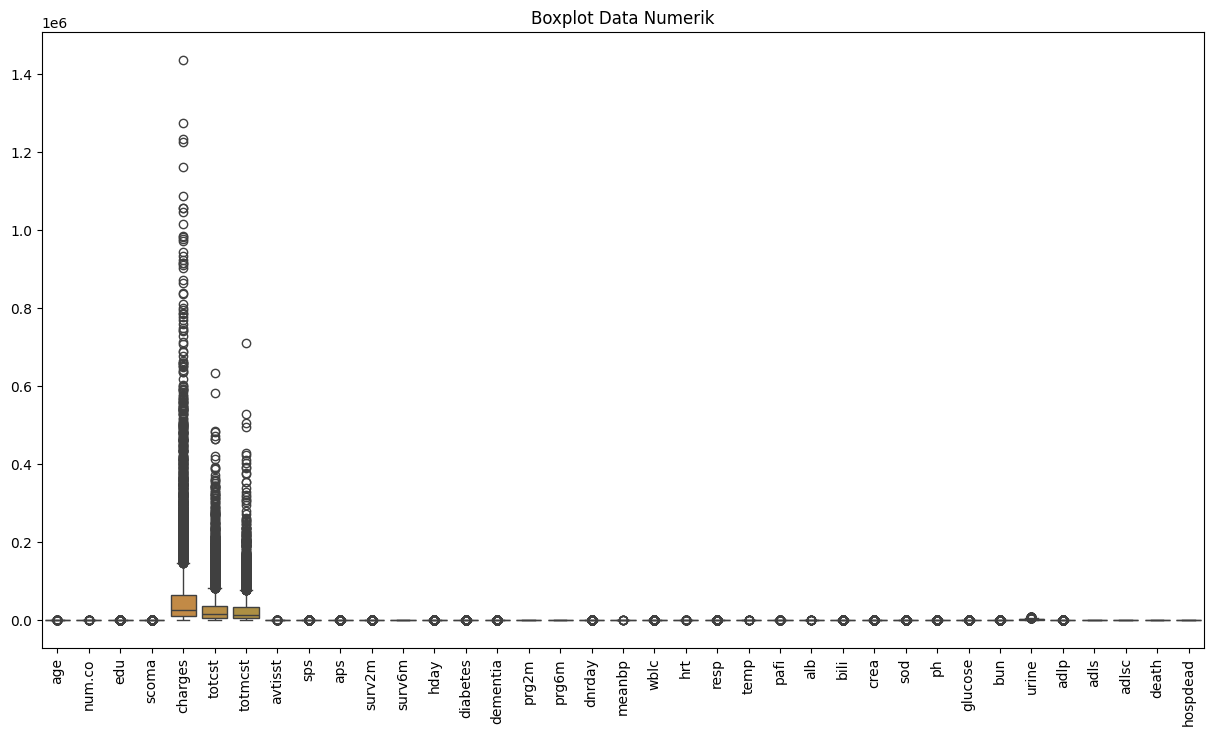

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot Data Numerik')
plt.show()

#### Menghapus outlier pada kolom "charges", "totcst", "totmcst" menggunakan IQR
Menghilangkan nilai ekstrem yang bisa mengganggu model prediksi.

In [19]:
outlier_cols = ["charges", "totcst", "totmcst"]

Q1 = df_median_death[outlier_cols].quantile(0.25)
Q3 = df_median_death[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 6.0 * IQR
upper_bound = Q3 + 6.0 * IQR

df_median_death = df_median_death[~((df_median_death[outlier_cols] < lower_bound) | (df_median_death[outlier_cols] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah handling outliers: {df_median_death.shape[0]}")


Jumlah data setelah handling outliers: 8488


Cek kembali distribusinya sebelum dan sesudah outlier dihapus


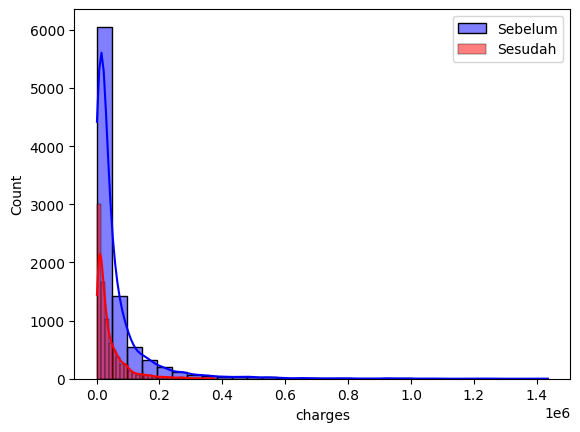

In [20]:
sns.histplot(df["charges"], bins=30, kde=True, color="blue", label="Sebelum")
sns.histplot(df_median_death["charges"], bins=30, kde=True, color="red", label="Sesudah")
plt.legend()
plt.show()

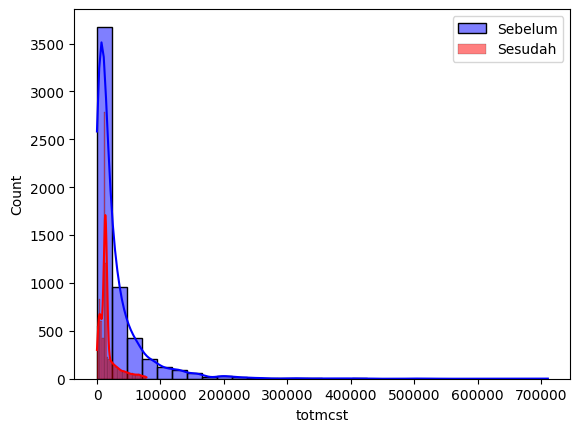

In [21]:
sns.histplot(df["totmcst"], bins=30, kde=True, color="blue", label="Sebelum")
sns.histplot(df_median_death["totmcst"], bins=30, kde=True, color="red", label="Sesudah")
plt.legend()
plt.show()

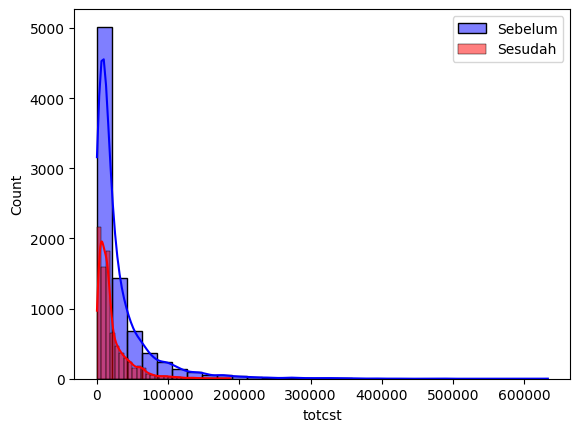

In [22]:
sns.histplot(df["totcst"], bins=30, kde=True, color="blue", label="Sebelum")
sns.histplot(df_median_death["totcst"], bins=30, kde=True, color="red", label="Sesudah")
plt.legend()
plt.show()

Cek distribusi target yang akan digunakan

C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\3906562997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_median_death['death'], palette='coolwarm')


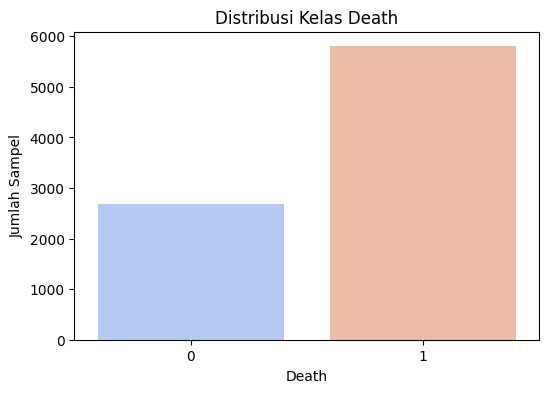

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_median_death['death'], palette='coolwarm')
plt.title("Distribusi Kelas Death")
plt.xlabel("Death")
plt.ylabel("Jumlah Sampel")
plt.show()


#### Label encoder.
Mengubah variabel kategorikal menjadi numerik agar bisa digunakan dalam algoritma machine learning

In [24]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_median_death[col] = le.fit_transform(df_median_death[col])
    # df_mean[col] = le.fit_transform(df_mean[col])
    # df_median[col] = le.fit_transform(df_median[col])
    label_encoders[col] = le

#### Standard scaler
Menstandarisasi skala fitur numerik agar model machine learning lebih stabil dan performa lebih optimal.
Lalu Meningkatkan performa algoritma berbasis jarak seperti K-Nearest Neighbors.

In [ ]:
scaler = StandardScaler()
df_scaled_median_death = pd.DataFrame(scaler.fit_transform(df_median_death), columns=df_median_death.columns)
# df_scaled_mean = pd.DataFrame(scaler.fit_transform(df_mean), columns=df_mean.columns)
# df_scaled_median = pd.DataFrame(scaler.fit_transform(df_median), columns=df_median.columns) 

#### PCA 95% variance
Mengurangi resiko overfitting dan mengurangi jumlah fitur (dimensi data) tanpa kehilangan terlalu banyak informasi.

In [26]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled_median_death)

print(f"Jumlah komponen PCA yang dipilih: {df_pca.shape[1]}")

Jumlah komponen PCA yang dipilih: 35


In [27]:
# from sklearn.ensemble import RandomForestClassifier

# X = df_scaled_median_death.drop(columns=['death'])  # Pastikan kolom 'death' tidak ikut sebagai fitur
# y = df_scaled_median_death['death']
# y_class = (y > 0).astype(int)  
# # Inisialisasi model Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y_class)

# feature_importances = rf.feature_importances_

# feature_importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance_df.head(10))


In [28]:
# plt.figure(figsize=(12, 6))
# sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
# plt.title("Feature Importance - Random Forest")
# plt.xlabel("Importance Score")
# plt.ylabel("Feature")
# plt.show()


In [29]:
# selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()
# X_selected = X[selected_features]  # Dataset dengan fitur terpilih

# print(f"Jumlah fitur yang dipilih: {len(selected_features)}")
# print(f"Fitur yang dipilih: {selected_features}")


Membagi data menjadi 80% training dan 20% testing untuk implementasi KNN pada target death.
Lalu mengukur performa model dengan akurasi & classification report.

In [30]:
y = df_scaled_median_death['death']
y_class = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y_class, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")



knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Jumlah data latih: 6790
Jumlah data uji: 1698
Akurasi Model KNN: 0.9753
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       538
           1       0.98      0.99      0.98      1160

    accuracy                           0.98      1698
   macro avg       0.97      0.97      0.97      1698
weighted avg       0.98      0.98      0.98      1698



Mencari nilai K terbaik berdasarkan akurasi model.

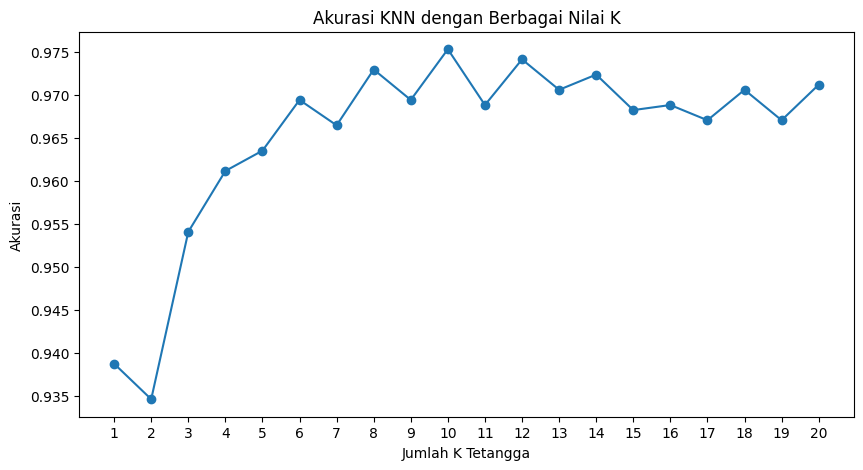

In [31]:
k_values = range(1, 21) 
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Jumlah K Tetangga")
plt.ylabel("Akurasi")
plt.title("Akurasi KNN dengan Berbagai Nilai K")
plt.xticks(k_values)
plt.show()


In [32]:
# X_median_death = df_scaled_median_death.drop(columns=['death'])  
# X_mean = df_scaled_mean.drop(columns=['death'])
# X_median = df_scaled_median.drop(columns=['death']) 

# y = df['death'].astype(int)
# X_train_median_death, X_test_median_death, y_train, y_test = train_test_split(X_median_death, y, test_size=0.2, random_state=42)
# X_train_mean, X_test_mean, _, _ = train_test_split(X_mean, y, test_size=0.2, random_state=42)  
# X_train_median, X_test_median, _, _ = train_test_split(X_median, y, test_size=0.2, random_state=42)

# knn_median_death = KNeighborsClassifier()
# knn_mean = KNeighborsClassifier()
# knn_median = KNeighborsClassifier()

# knn_median_death.fit(X_train_median_death, y_train)
# knn_mean.fit(X_train_mean, y_train)
# knn_median.fit(X_train_median, y_train)

# y_pred_median_death = knn_median_death.predict(X_test_median_death)
# y_pred_mean = knn_mean.predict(X_test_mean)
# y_pred_median = knn_median.predict(X_test_median)

# accuracy_median_death = accuracy_score(y_test, y_pred_median_death)
# accuracy_mean = accuracy_score(y_test, y_pred_mean)
# accuracy_median = accuracy_score(y_test, y_pred_median)

# print("\nClassification Report - Imputasi Median berdasarkan 'Death':")
# print(classification_report(y_test, y_pred_median_death))

# print("\nClassification Report - Imputasi Mean:")
# print(classification_report(y_test, y_pred_mean))

# print("\nClassification Report - Imputasi Median:")
# print(classification_report(y_test, y_pred_median))


## Visualisasi Hasil Preprocessing

#### Visualisasi Demografi Pasien

Visualisasi ini bertujuan untuk memberikan gambaran umum terkait profil demografi pasien ICU, yang menjadi dasar dalam analisis karakteristik populasi dan potensi faktor risiko.

##### Deskripsi Visualisasi:

Distribusi Gender:

Wanita: 56.4%
Pria: 43.6%
→ Menunjukkan dominasi pasien wanita dalam populasi ICU.
Distribusi Pendapatan:

Mayoritas pasien berasal dari kategori penghasilan < $11k, menyoroti potensi dampak status sosial ekonomi rendah terhadap kebutuhan perawatan ICU.
Distribusi Pendidikan:

Sebagian besar pasien memiliki tingkat pendidikan 6-12 tahun (setara pendidikan menengah), yang bisa berkorelasi dengan faktor kesehatan jangka panjang.

Distribusi Usia:

Pola usia mengikuti distribusi normal dengan puncak di usia sekitar 65-75 tahun, memperlihatkan konsentrasi tinggi pasien lansia dalam ICU.

Insight Utama:
Pasien ICU cenderung lebih banyak berasal dari kelompok usia tua, berpendapatan rendah, dan tingkat pendidikan menengah.
Potensi hubungan antara demografi rendah (pendapatan & pendidikan) dengan outcome klinis perlu dieksplorasi lebih lanjut.
Gender, usia, dan status sosial-ekonomi berpotensi menjadi fitur penting dalam model prediksi risiko mortality ICU.


C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\4219832461.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\4219832461.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


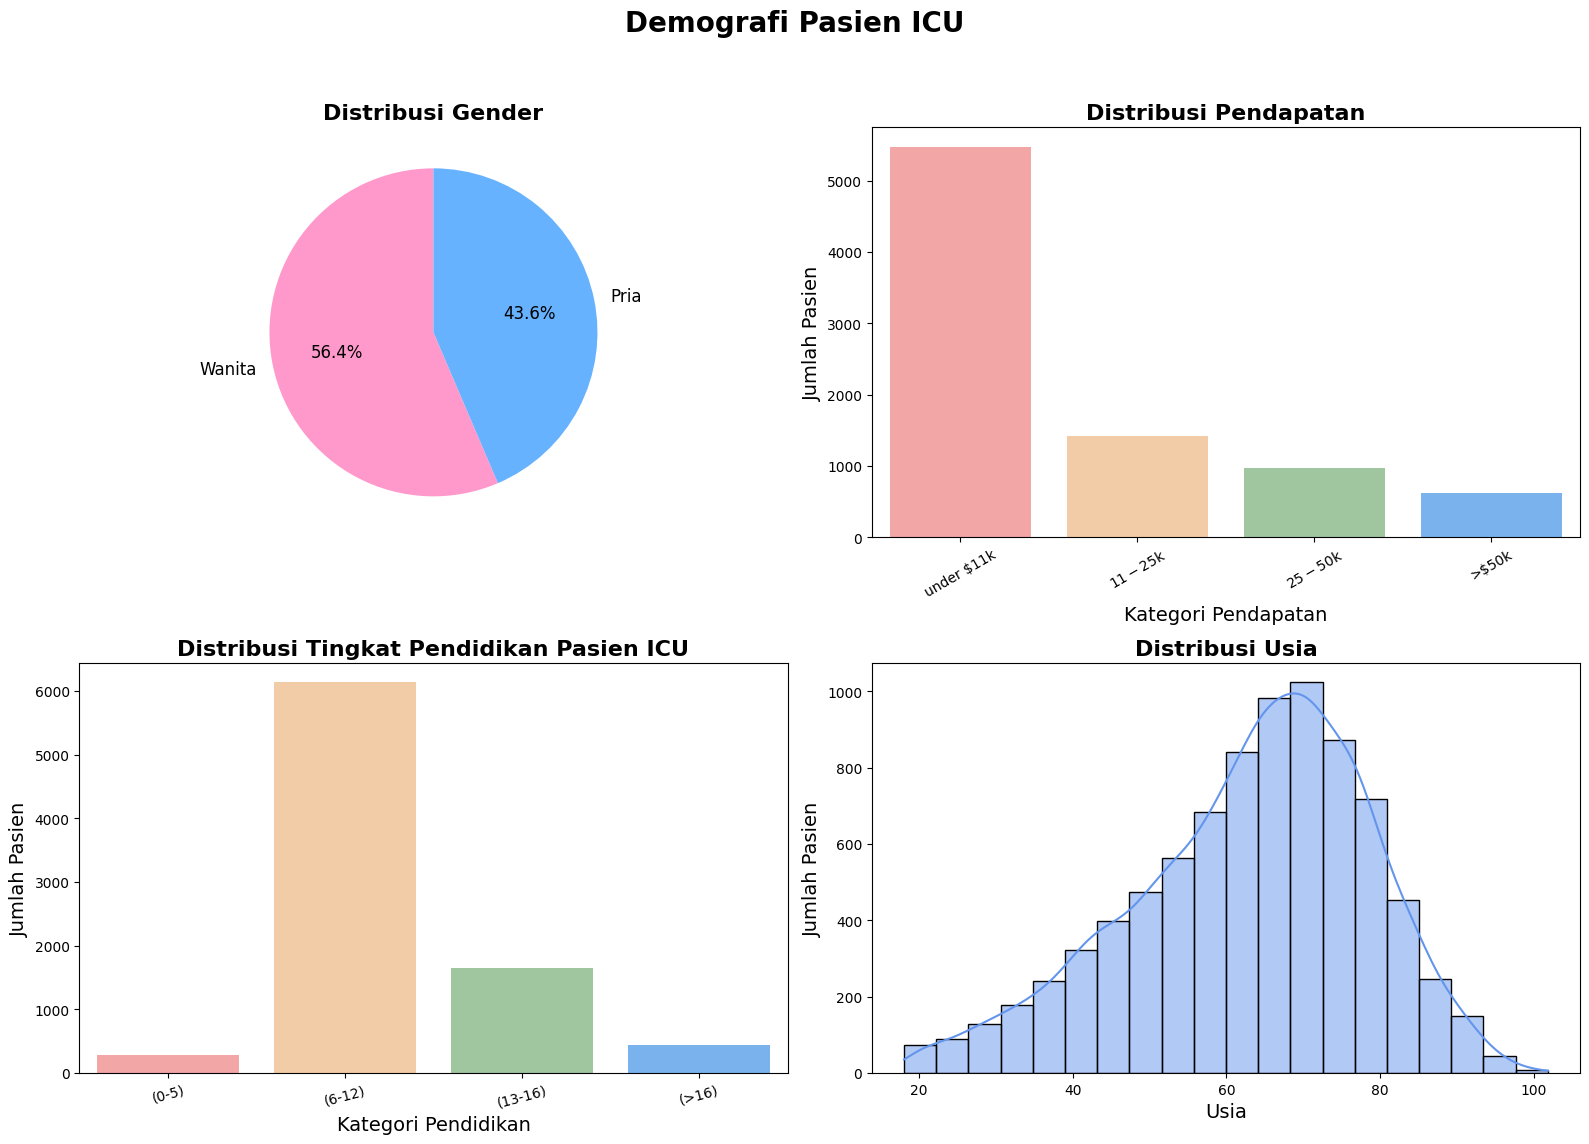

In [35]:
gender_labels = {0: 'Pria', 1: 'Wanita'}
gender_counts = df_median_death['sex'].map(gender_labels).value_counts()

income_labels = {
    0: '$11-$25k',
    1: '$25-$50k',
    2: '>$50k',
    3: 'under $11k'
}
income_counts = df_median_death['income'].value_counts().sort_index()
income_counts.index = income_counts.index.map(income_labels)
income_order = ['under $11k', '$11-$25k', '$25-$50k', '>$50k']

df_median_death['edu_category'] = pd.cut(
    df_median_death['edu'],
    bins=[-1, 5, 12, 16, df_median_death['edu'].max()],
    labels=['(0-5)', '(6-12)', '(13-16)', '(>16)']
)
edu_counts = df_median_death['edu_category'].value_counts().sort_index()

age_data = df_median_death['age']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Demografi Pasien ICU', fontsize=20, fontweight='bold')

axes[0, 0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['#FF99CC','#66B2FF'],
    startangle=90,
    textprops={'fontsize': 12}
)
axes[0, 0].set_title('Distribusi Gender', fontsize=16, fontweight='bold')

sns.barplot(
    ax=axes[0, 1],
    x=income_counts.index,
    y=income_counts.values,
    palette=['#FF9999', '#FFCC99', '#99CC99', '#66B2FF'],
    order=income_order
)
axes[0, 1].set_title('Distribusi Pendapatan', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Kategori Pendapatan', fontsize=14)
axes[0, 1].set_ylabel('Jumlah Pasien', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=30)

sns.barplot(
    ax=axes[1, 0],
    x=edu_counts.index,
    y=edu_counts.values,
    palette=['#FF9999', '#FFCC99', '#99CC99', '#66B2FF']
)
axes[1, 0].set_title('Distribusi Tingkat Pendidikan Pasien ICU', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Kategori Pendidikan', fontsize=14)
axes[1, 0].set_ylabel('Jumlah Pasien', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=15)

sns.histplot(
    age_data,
    bins=20,
    kde=True,
    color='#6495ED',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Distribusi Usia', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Usia', fontsize=14)
axes[1, 1].set_ylabel('Jumlah Pasien', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Visualisasi distribusi Usia Pasien ICU per Gender (Population Pyramid)

Visualisasi ini bertujuan untuk menggambarkan distribusi usia pasien ICU berdasarkan gender dalam bentuk piramida populasi, guna mengidentifikasi dominasi kelompok usia dan gender dalam populasi ICU.

##### Deskripsi Visualisasi:
Rentang Usia:
Data dikategorikan dalam kelompok usia 10 tahunan mulai dari 0–10 tahun hingga 90–100 tahun.

Gender:

Pria (biru): Terlihat dominasi pasien pria pada rentang usia 60–80 tahun.
Wanita (pink): Lebih banyak pada kelompok usia 50–70 tahun, dengan puncak signifikan di 60–70 tahun.

Karakteristik Distribusi:

Piramida menunjukkan konsentrasi usia lanjut (lansia), yang menggambarkan bahwa mayoritas pasien ICU berusia di atas 50 tahun.
Distribusi relatif simetris antara pria dan wanita, meskipun wanita sedikit lebih dominan pada usia kritis (60-70 tahun).

Insight Utama:
Pasien usia lanjut (>60 tahun) merupakan kelompok terbanyak yang menjalani perawatan ICU, menyoroti pentingnya perhatian khusus pada manajemen penyakit degeneratif dan kronis.
Gender wanita mendominasi usia kritis, mengindikasikan potensi risiko kesehatan yang lebih tinggi pada wanita lansia di ICU.
Korelasi antara usia lanjut dan outcome klinis (seperti mortality) menjadi area strategis untuk investigasi lebih lanjut.

C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\209085748.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([abs(int(x)) for x in ax.get_xticks()])


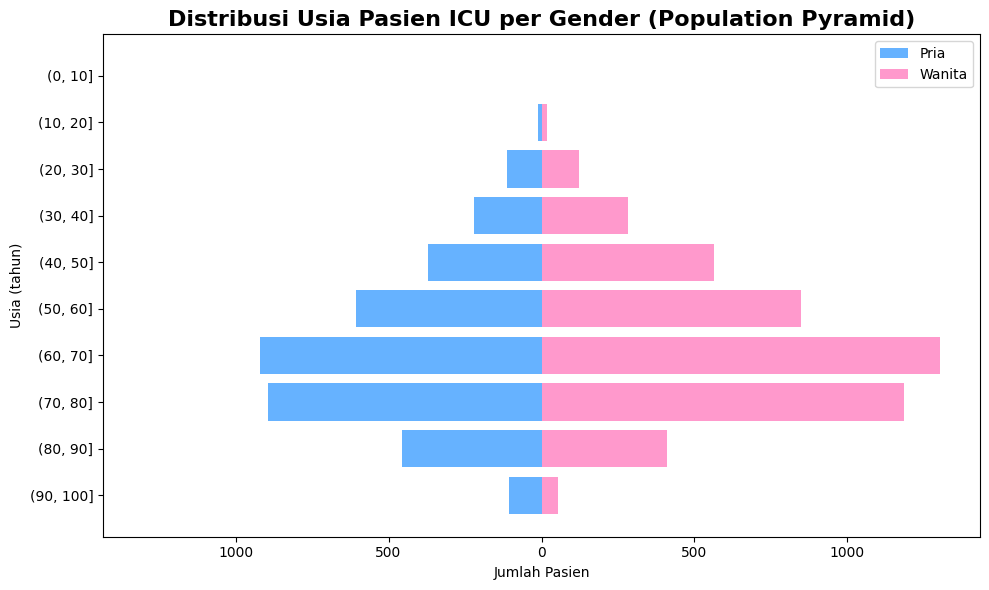

In [36]:
bins = range(0, 101, 10)
male_counts, _ = pd.cut(df_median_death[df_median_death['sex'] == 0]['age'], bins=bins, retbins=True)
female_counts, _ = pd.cut(df_median_death[df_median_death['sex'] == 1]['age'], bins=bins, retbins=True)

male_distribution = male_counts.value_counts().sort_index()
female_distribution = female_counts.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(male_distribution.index.astype(str), -male_distribution.values, color='#66B2FF', label='Pria')
ax.barh(female_distribution.index.astype(str), female_distribution.values, color='#FF99CC', label='Wanita')

ax.set_xlabel('Jumlah Pasien')
ax.set_ylabel('Usia (tahun)')
ax.set_title('Distribusi Usia Pasien ICU per Gender (Population Pyramid)', fontsize=16, fontweight='bold')
ax.legend(loc='upper right')

ax.set_xlim(-max(male_distribution.max(), female_distribution.max()) * 1.1,
             max(male_distribution.max(), female_distribution.max()) * 1.1)
ax.set_xticklabels([abs(int(x)) for x in ax.get_xticks()])
ax.invert_yaxis()

plt.tight_layout()
plt.show()


### Visualisasi Distribusi Death Pasien ICU
Visualisasi ini bertujuan untuk menampilkan proporsi outcome pasien ICU, yang terbagi menjadi dua kategori utama: Selamat dan Meninggal. Ini membantu memahami gambaran umum tingkat keberhasilan perawatan intensif.

#### Deskripsi Visualisasi:

Outcome Pasien:

Meninggal (68.3%) – Total 5.801 pasien mengalami kematian selama perawatan di ICU.
Selamat (31.7%) – Total 2.686 pasien berhasil melewati masa kritis dan selamat.
Karakteristik Distribusi:
Grafik pie chart ini menunjukkan bahwa lebih dari setengah pasien ICU memiliki outcome negatif, menyoroti tingginya tingkat mortalitas dalam populasi ini.

Insight Utama:
Tingkat kematian tinggi (68.3%) menunjukkan beban klinis yang berat dalam pengelolaan pasien ICU.
Perlu perhatian khusus terhadap variabel klinis yang berkontribusi pada outcome buruk, seperti usia lanjut, komorbiditas, dan skor klinis awal.
Data ini dapat menjadi dasar validasi untuk membangun model prediksi risiko kematian pada pasien ICU.

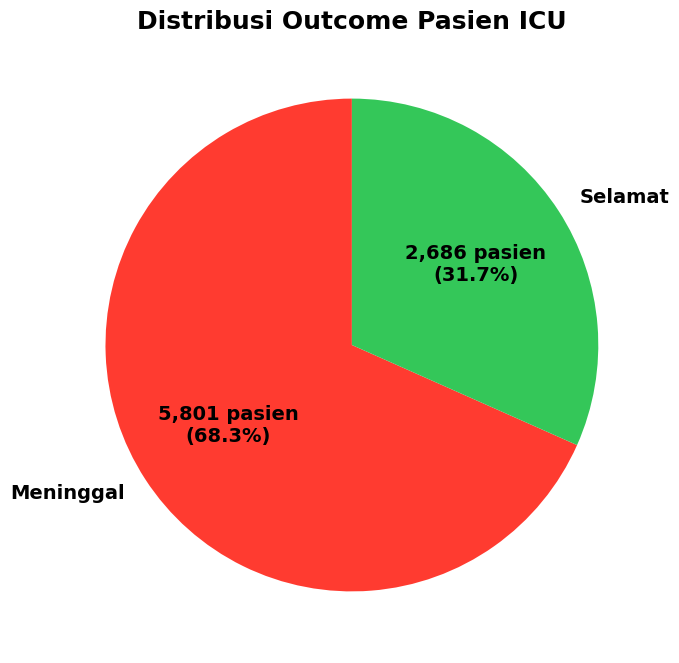

In [37]:
outcome_counts = df_median_death['death'].value_counts()
labels = ['Meninggal', 'Selamat']
colors = ['#FF3B30', '#34C759']

plt.figure(figsize=(8, 8))
plt.pie(
    outcome_counts, 
    labels=labels, 
    autopct=lambda pct: f"{int(pct/100.*outcome_counts.sum()):,} pasien\n({pct:.1f}%)",
    startangle=90, 
    colors=colors,
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)
plt.title('Distribusi Outcome Pasien ICU', fontsize=18, fontweight='bold')
plt.show()


### Visualisasi Distribusi Usia Pasien ICU per Outcome (Violin Plot)

Visualisasi ini bertujuan untuk memahami distribusi usia pasien ICU berdasarkan outcome klinis, yaitu Meninggal dan Selamat, dengan pendekatan violin plot yang menggambarkan kepadatan distribusi usia pada masing-masing kelompok.

#### Deskripsi Visualisasi:
Outcome:

Meninggal (0) – Mayoritas pasien dengan outcome meninggal memiliki rentang usia dominan antara 60-75 tahun.
Selamat (1) – Pasien yang selamat cenderung memiliki usia yang sedikit lebih muda dengan kepadatan pada rentang 55-70 tahun.

Karakteristik Distribusi:

Distribusi usia pada kedua outcome memperlihatkan adanya pergeseran ke usia lebih tua pada outcome meninggal.
Rentang usia pasien cukup lebar pada kedua outcome, dengan usia termuda di bawah 30 tahun dan tertua mendekati 100 tahun.

Insight Utama:
Pasien ICU yang lebih tua cenderung memiliki risiko kematian lebih tinggi dibandingkan pasien yang lebih muda.
Terdapat indikasi hubungan positif antara usia lanjut dengan peningkatan risiko mortalitas di ICU.
Violin plot ini memberikan gambaran lebih detail dibanding boxplot dengan memperlihatkan distribusi kepadatan data.

C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\1606326126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


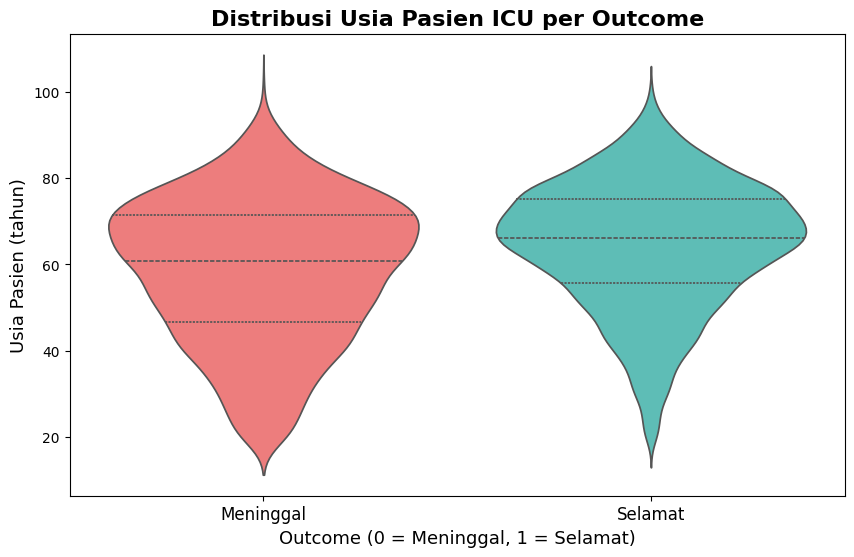

In [ ]:
palette = {'0': '#ff6b6b', 
           '1': '#4ecdc4'} 

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df, 
    x='death', 
    y='age', 
    palette=palette,
    inner='quartile'
)

plt.title('Distribusi Usia Pasien ICU per Outcome', fontsize=16, weight='bold')
plt.xlabel('Outcome (0 = Meninggal, 1 = Selamat)', fontsize=13)
plt.ylabel('Usia Pasien (tahun)', fontsize=13)
plt.xticks([0,1], ['Meninggal', 'Selamat'], fontsize=12)
plt.show()


### Visualisasi Persentase Kematian per Disease Group 

Visualisasi ini memberikan insight terkait tingkat kematian pasien ICU berdasarkan diagnosis utama penyakit (Disease Group), sehingga memfasilitasi identifikasi kelompok penyakit kritis dengan risiko mortalitas tinggi.

Highlight Temuan:

Lung Cancer dan MOSF w/malig menjadi disease group dengan risiko kematian ekstrem di atas 90%.
Kelompok penyakit dengan komplikasi multi-organ seperti Coma dan ARF/MOSF turut menunjukkan tingkat mortalitas signifikan.
Penyakit kronis seperti COPD dan CHF meskipun lebih rendah, tetap menunjukkan risiko kematian lebih dari 50%.

Insight Utama:
Pasien dengan kanker dan kegagalan multi-organ merupakan kelompok prioritas mitigasi risiko di ICU.
Penanganan proaktif terhadap pasien dengan comorbid kritis seperti Cirrhosis dan Sepsis berpotensi meningkatkan survival rate.
Data ini dapat digunakan sebagai dasar strategi alokasi resource ICU, intervensi dini, dan optimalisasi palliative care.


C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\1101867508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


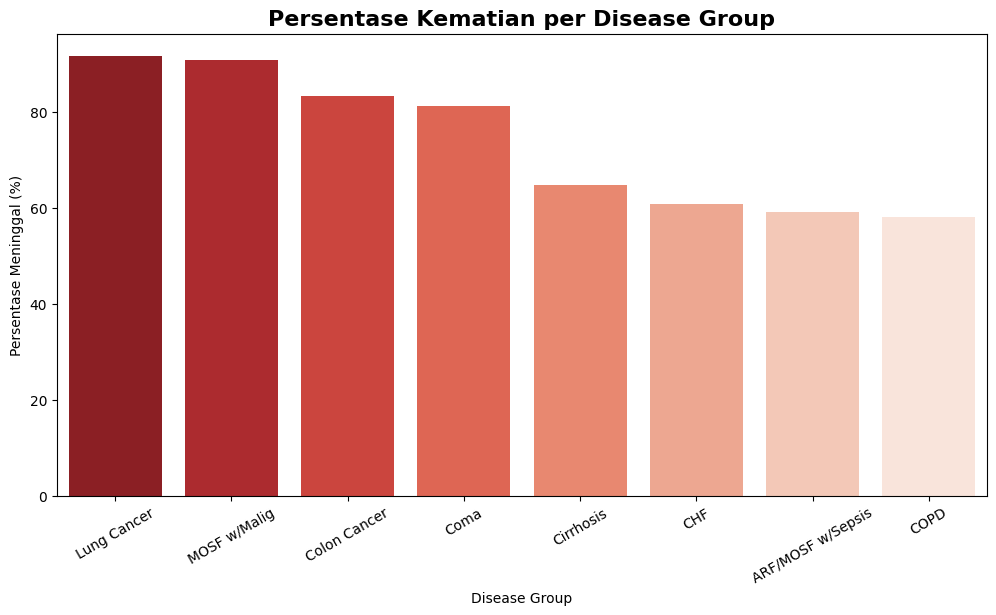

,dzgroup,total_pasien,total_meninggal,persentase_meninggal
6,Lung Cancer,908,833,91.740088
7,MOSF w/Malig,712,647,90.870787
4,Colon Cancer,512,427,83.398438
5,Coma,596,484,81.208054
3,Cirrhosis,508,329,64.763780
1,CHF,1387,844,60.850757
0,ARF/MOSF w/Sepsis,3515,2076,59.061166
2,COPD,967,561,58.014478


In [51]:
df_mortality = df.groupby('dzgroup')['death'].agg(['count', 'sum']).reset_index()
df_mortality.rename(columns={'count': 'total_pasien', 'sum': 'total_meninggal'}, inplace=True)

df_mortality['persentase_meninggal'] = (df_mortality['total_meninggal'] / df_mortality['total_pasien']) * 100

df_mortality = df_mortality.sort_values('persentase_meninggal', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_mortality, 
    x='dzgroup', 
    y='persentase_meninggal', 
    palette='Reds_r'
)
plt.title('Persentase Kematian per Disease Group', fontsize=16, weight='bold')
plt.ylabel('Persentase Meninggal (%)')
plt.xlabel('Disease Group')
plt.xticks(rotation=30)
plt.show()

df_mortality


### Visualisasi Distribusi Prediksi Survival (Prg2m & Prg6m) terhadap death

#### Deskripsi Visualisasi:
Visualisasi ini menampilkan distribusi probabilitas prediksi survival pasien ICU dalam 2 bulan (Prg2m) dan 6 bulan (Prg6m) yang diberikan oleh ahli fisik (dokter).
Violin Plot digunakan untuk menggambarkan kepadatan distribusi penilaian klinis pada dua outcome akhir pasien (Selamat dan Meninggal).

2 Bulan (Prg2m)	Selamat	Terdistribusi tinggi di atas 0.75	Ahli fisik optimis terhadap survival jangka pendek.

2 Bulan (Prg2m)	Meninggal	Cenderung rendah (<0.5), tapi variatif	Ada keraguan dalam prediksi pasien kritis.

6 Bulan (Prg6m)	Selamat	Mulai bergeser ke rentang 0.5 - 0.8	Keyakinan survival menurun seiring waktu.

6 Bulan (Prg6m)	Meninggal	Dominan di bawah 0.5 dengan puncak padat	Prediksi ahli lebih konsisten untuk outcome buruk jangka panjang.

Analisis Strategis:
Validasi Klinis:
Terlihat bahwa prediksi dokter lebih akurat dalam horizon pendek (2 bulan) dengan tingkat optimisme tinggi terhadap pasien yang selamat. Namun, prediksi menjadi lebih konservatif di 6 bulan, mencerminkan ketidakpastian tinggi dalam long-term care.

Potensi Bias:
Perlu evaluasi lebih dalam apakah terdapat over-optimisme dalam prediksi short-term dan over-pessimism dalam long-term. Ini bisa berpengaruh pada keputusan intervensi atau alokasi sumber daya.

Outcome Realisasi:
Distribusi yang lebih jelas memisahkan outcome "Selamat" dan "Meninggal" menunjukkan bahwa judgement klinis cukup reliable, tapi tetap memerlukan kalibrasi berbasis data histori

C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\927507122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hospdead_label', y='prg2m', data=df_median_death,inner = None, palette=['#4ecdc4', '#ff6b6b'])
C:\Users\fbkby\AppData\Local\Temp\ipykernel_64844\927507122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hospdead_label', y='prg6m', data=df_median_death,inner = None, palette=['#4ecdc4', '#ff6b6b'])


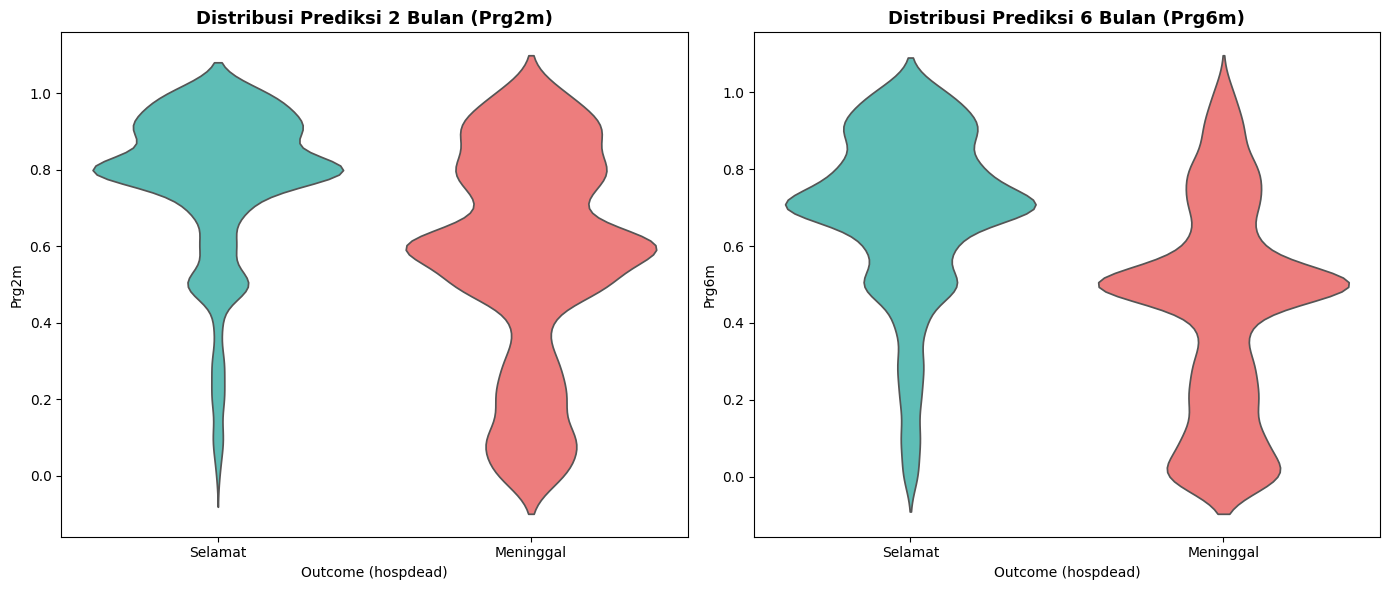

In [ ]:
df_median_death['hospdead_label'] = df_median_death['death'].map({0: 'Selamat', 1: 'Meninggal'})

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.violinplot(x='hospdead_label', y='prg2m', data=df_median_death,inner = None, palette=['#4ecdc4', '#ff6b6b'])
plt.title('Distribusi Prediksi 2 Bulan (Prg2m)', fontsize=13, weight='bold')
plt.xlabel('Death')
plt.ylabel('Prg2m')

plt.subplot(1, 2, 2)
sns.violinplot(x='hospdead_label', y='prg6m', data=df_median_death,inner = None, palette=['#4ecdc4', '#ff6b6b'])
plt.title('Distribusi Prediksi 6 Bulan (Prg6m)', fontsize=13, weight='bold')
plt.xlabel('Death')
plt.ylabel('Prg6m')
plt.tight_layout()
plt.show()



### Visualisasi Heatmap Korelasi Variabel Vital terhadap Death

Heatmap ini menggambarkan korelasi antar variabel vital pasien ICU terhadap outcome kematian (death). Nilai korelasi berkisar dari -1 (negatif sempurna) sampai +1 (positif sempurna), dengan highlight warna memperjelas hubungan signifikan.

Fakta Utama dari Heatmap:
Hanya dua variabel yang menunjukkan korelasi berarti terhadap death:

sps (Severity of Patient Score): 0.16

aps (Acute Physiology Score): 0.16

Kedua skor ini relevan klinis karena secara langsung mengukur tingkat keparahan pasien, jadi logis kalau mereka nyambung ke outcome kematian.

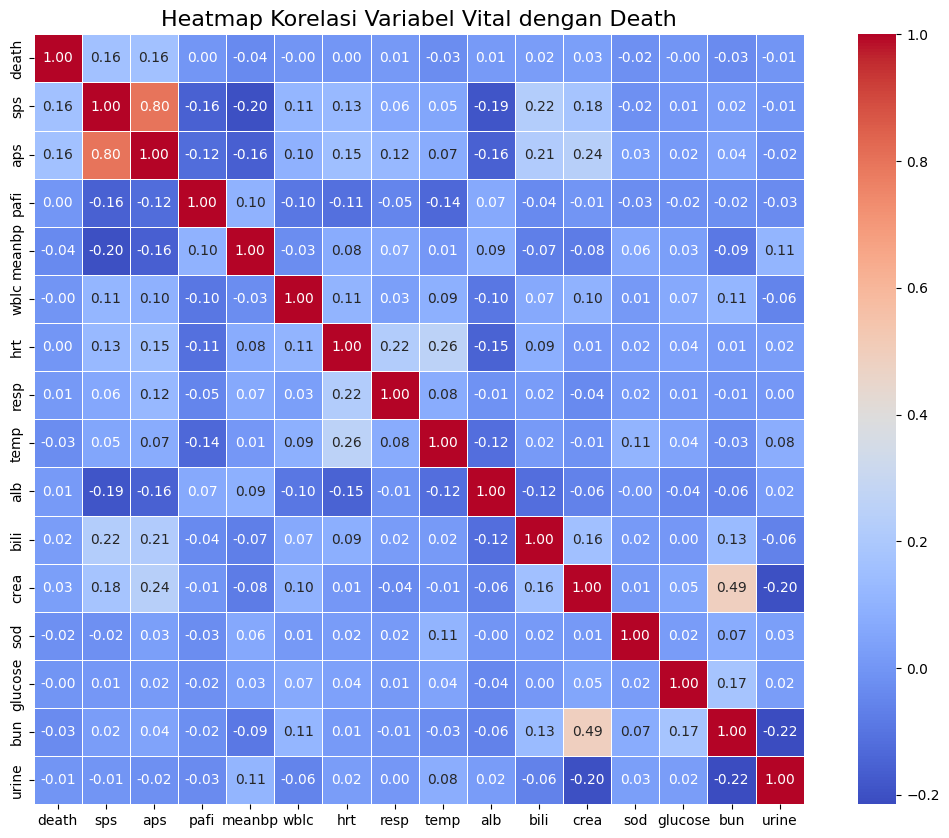

In [48]:
vital_columns = ['death', 'sps', 'aps', 'pafi', 'meanbp', 'wblc', 'hrt', 'resp',
                 'temp', 'alb', 'bili', 'crea', 'sod', 'glucose', 'bun', 'urine']

df_vitals = df_median_death[vital_columns]

corr_matrix = df_vitals.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Heatmap Korelasi Variabel Vital dengan Death', fontsize=16)
plt.show()

### Kesimpulan Akhir

Terdapat beberapa key insights strategis yang perlu menjadi perhatian utama dalam pengembangan model prediktif dan perencanaan intervensi klinis ke depan:

Prediksi Klinis Ahli (Prg2m & Prg6m)
Terbukti memiliki distribusi yang berbeda antara pasien selamat dan meninggal. Hal ini mengindikasikan adanya value signifikan dari judgement klinis sebagai fitur prediktif survival.

Korelasi Vital Sign dengan Kematian
Ditemukan bahwa hanya skor klinis seperti SAPS dan APS yang memiliki korelasi bermakna terhadap kematian pasien. Variabel vital lainnya menunjukkan korelasi sangat rendah (< 0.03), sehingga perlu pendekatan feature engineering lebih lanjut untuk meningkatkan predictive power.

Final Recommendation
🔹 Prioritaskan fitur-fitur high-impact seperti sps, aps, prg2m, dan prg6m dalam model machine learning untuk meningkatkan akurasi prediksi.
